In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
import os
PathToRepo = os.path.normpath(os.getcwd() + os.sep + os.pardir)
Data = pd.read_csv(PathToRepo + '\\Data\\Faellesdata.csv')

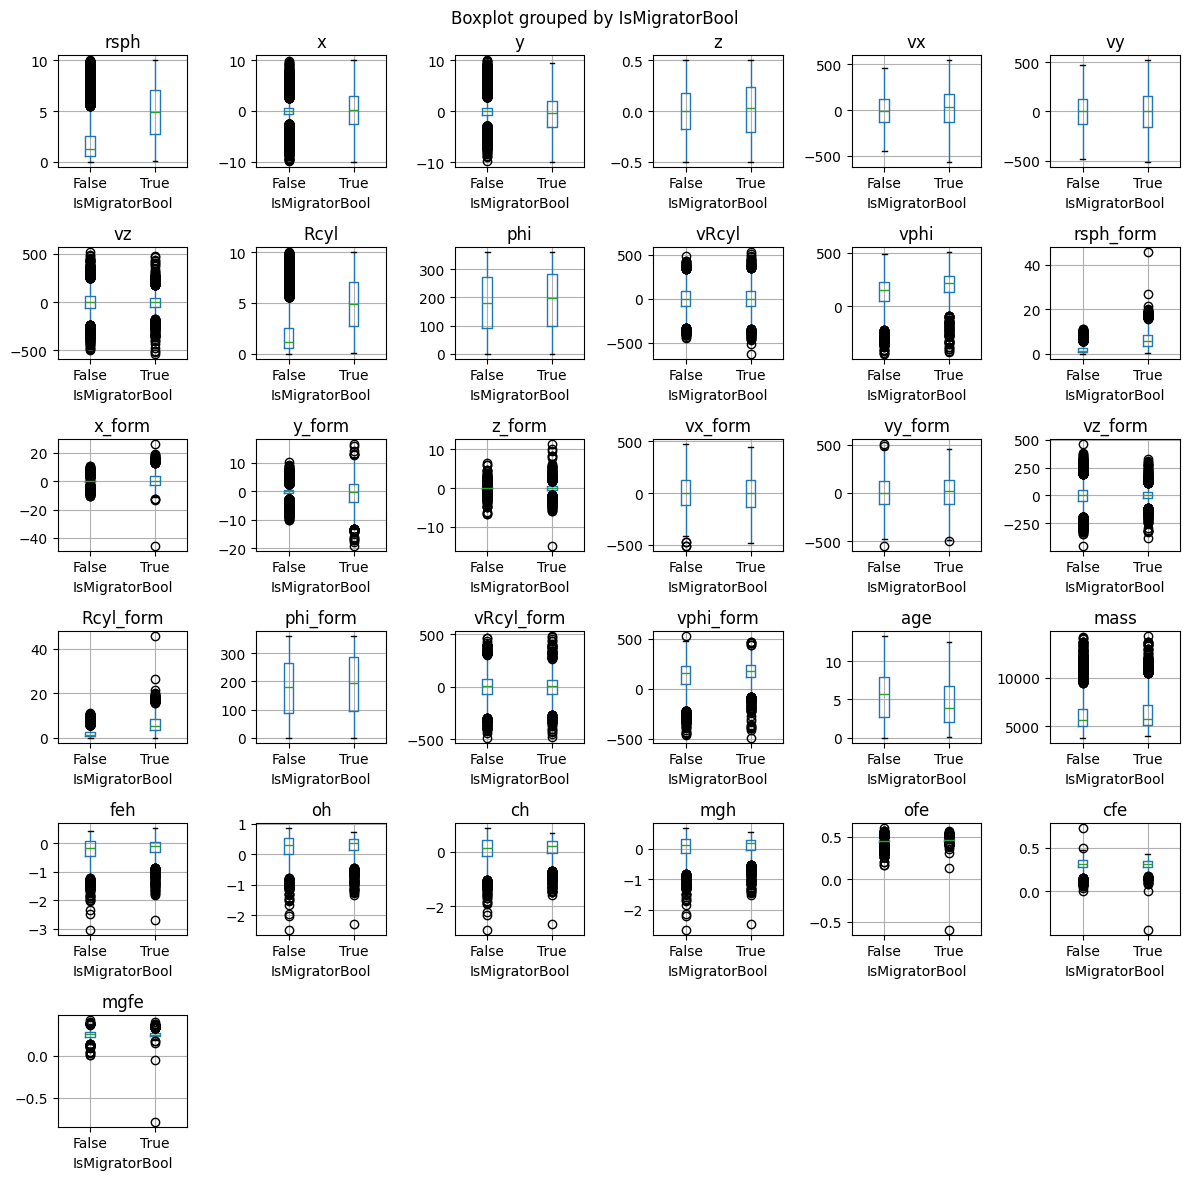

In [15]:
fig, axs = plt.subplots(6, 6, figsize = (12,12)) #Setting up the plot
fig.set_tight_layout(True)
fig.suptitle("Boxplots of the different columns in Auto, grouped by mpg01") #Title

columns = Data.columns[:-2] #All columns except the last two
counter = 0

for i in range(6): #Makes all the boxplots, iterating over the different columns
    for j in range(6):
        Data.boxplot(column = columns[counter], by = 'IsMigratorBool', ax = axs[i,j])
        counter += 1
        if counter == len(columns): break
for i in range(1,6):
    fig.delaxes(axs[5][i]) #Removes empty plots
plt.savefig(PathToRepo + '\\Plots\\Boxplots.png')
plt.show() 

### Fitting models

In [25]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import accuracy_score

In [17]:
DataFinal = Data.drop([
        'rsph', 'x', 'y', 'vx', 'vy', 'rsph_form', 'x_form', 
        'y_form', 'z_form', 'vx_form', 'vy_form',
        'vz_form', 'Rcyl_form', 'phi_form', 'vRcyl_form', 'vphi_form'
       ], axis = 1)
DataFinal.columns[:-2]
fitstr = "IsMigratorBool ~ "
for i in range(len(DataFinal.columns[:-2])):
    fitstr += DataFinal.columns[i] + " + "
fitstr = fitstr[:-3]
print(fitstr)

IsMigratorBool ~ z + vz + Rcyl + phi + vRcyl + vphi + age + mass + feh + oh + ch + mgh + ofe + cfe + mgfe


In [28]:
train, test = train_test_split(DataFinal, test_size=0.2)

model = smf.glm(formula = fitstr, data = train, family = sm.families.Binomial())

# Fit the model
summary = model.fit().summary()
# Display and interpret results
with open(PathToRepo + '\\Tables\\GLMFull.tex', 'w') as f:
    f.write(summary.as_latex())

#accuracy
pred = model.fit().predict(test)
print(accuracy_score(test['IsMigratorBool'], pred < 0.5))
summary

0.852


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Generalized Linear Model Regression Results                                 
=============================================================================================================
Dep. Variable:     ['IsMigratorBool[False]', 'IsMigratorBool[True]']   No. Observations:                 8000
Model:                                                           GLM   Df Residuals:                     7984
Model Family:                                               Binomial   Df Model:                           15
Link Function:                                                 Logit   Scale:                          1.0000
Method:                                                         IRLS   Log-Likelihood:                -2796.6
Date:                                               Thu, 12 Dec 2024   Deviance:                       5593.2
Time:                                                       20:40:33   Pearson chi2:                 7.70e+03
No. Iterations:                                                    6   Pseudo R-squ. (CS):             0.2147
Covariance Type:                                           nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.9901      1.108     -1.796      0.072      -4.162       0.181
z             -0.1276      0.130     -0.980      0.327      -0.383       0.128
vz             0.0006      0.000      1.910      0.056   -1.69e-05       0.001
Rcyl          -0.3711      0.017    -21.420      0.000      -0.405      -0.337
phi           -0.0006      0.000     -1.836      0.066      -0.001    4.04e-05
vRcyl      -1.292e-05      0.000     -0.046      0.963      -0.001       0.001
vphi          -0.0031      0.000     -8.897      0.000      -0.004      -0.002
age            0.4495      0.056      8.047      0.000       0.340       0.559
mass        8.143e-06   2.24e-05      0.364      0.716   -3.57e-05     5.2e-05
feh           -0.6838     92.127     -0.007      0.994    -181.249     179.881
oh           178.6314     74.657      2.393      0.017      32.306     324.957
ch           -45.1528     74.986     -0.602      0.547    -192.124     101.818
mgh         -131.1403     76.255     -1.720      0.085    -280.597      18.317
ofe         -167.6857     74.720     -2.244      0.025    -314.135     -21.237
cfe           56.3263     74.979      0.751      0.453     -90.630     203.283
mgfe         111.4482     76.215      1.462      0.144     -37.931     260.828
==============================================================================
"""

In [29]:
train, test = train_test_split(DataFinal, test_size=0.2)

model = smf.glm(formula = "IsMigratorBool ~ age + vphi + Rcyl", data = train, family = sm.families.Binomial())

# Fit the model
summary = model.fit().summary()
# Display and interpret results
with open(PathToRepo + '\\Tables\\GLMlowP.tex', 'w') as f:
    f.write(summary.as_latex())

#accuracy
pred = model.fit().predict(test)
print(accuracy_score(test['IsMigratorBool'], pred < 0.5))

summary

0.8535


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Generalized Linear Model Regression Results                                 
=============================================================================================================
Dep. Variable:     ['IsMigratorBool[False]', 'IsMigratorBool[True]']   No. Observations:                 8000
Model:                                                           GLM   Df Residuals:                     7996
Model Family:                                               Binomial   Df Model:                            3
Link Function:                                                 Logit   Scale:                          1.0000
Method:                                                         IRLS   Log-Likelihood:                -2876.6
Date:                                               Thu, 12 Dec 2024   Deviance:                       5753.2
Time:                                                       20:41:03   Pearson chi2:                 7.97e+03
No. Iterations:                                                    6   Pseudo R-squ. (CS):             0.2028
Covariance Type:                                           nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.5113      0.143     31.550      0.000       4.231       4.792
age           -0.1375      0.014    -10.091      0.000      -0.164      -0.111
vphi          -0.0041      0.000    -11.712      0.000      -0.005      -0.003
Rcyl          -0.4985      0.014    -34.409      0.000      -0.527      -0.470
==============================================================================
"""